In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
print(y_test)

[7 2 1 ... 4 5 6]


In [7]:
import numpy as np
indices = np.random.randint(0, x_train.shape[0], 16)


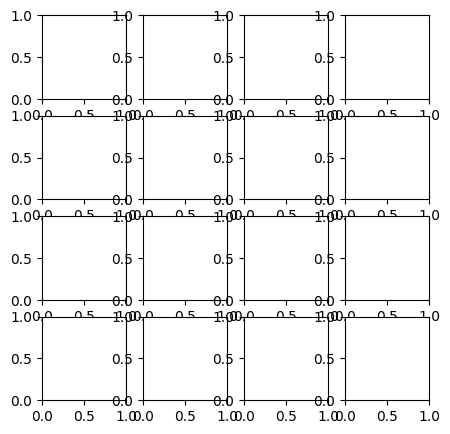

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5))


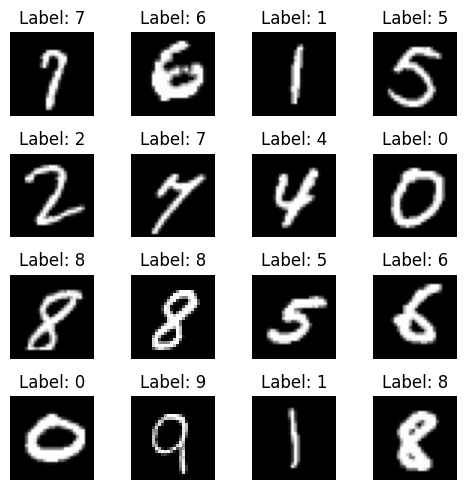

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5))


axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [14]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
num_classes = 10

#create the cnn model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
#train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9857 - val_loss: 0.0545
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 141ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9865 - val_loss: 0.0513
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9864 - val_loss: 0.0527
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9876 - val_loss: 0.0529
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9882 - val_loss: 0.0507
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9883 - val_loss: 0.0540
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9883 - val_loss: 0.0514
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 1.0000 - loss: 3